# Bank Customer Churn Prediction

In [1]:
#Importing the Libraries
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
#Reading the dataFile
df = pd.read_csv("D:/codSoft/Task-2/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [6]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [7]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [8]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaled = StandardScaler()

X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [10]:
model = Sequential()

model.add(Dense(8,activation='relu',input_dim=11))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


# Calculating the Loss

In [12]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy')

In [13]:
history = model.fit(X_train, y_train, epochs=90, batch_size=50, validation_split=0.2, verbose=1)

Epoch 1/90
128/128 [==============================] - 1s 3ms/step - loss: 3097.1091 - accuracy: 0.5947 - val_loss: 8.2836 - val_accuracy: 0.7969
Epoch 2/90
128/128 [==============================] - 0s 2ms/step - loss: 2.9601 - accuracy: 0.7709 - val_loss: 1.7663 - val_accuracy: 0.7412
Epoch 3/90
128/128 [==============================] - 0s 2ms/step - loss: 2.2539 - accuracy: 0.7744 - val_loss: 1.9221 - val_accuracy: 0.7962
Epoch 4/90
128/128 [==============================] - 0s 2ms/step - loss: 2.4826 - accuracy: 0.7703 - val_loss: 2.0904 - val_accuracy: 0.7962
Epoch 5/90
128/128 [==============================] - 0s 2ms/step - loss: 2.4353 - accuracy: 0.7702 - val_loss: 3.8943 - val_accuracy: 0.6369
Epoch 6/90
128/128 [==============================] - 0s 2ms/step - loss: 5.6049 - accuracy: 0.7656 - val_loss: 4.8739 - val_accuracy: 0.6206
Epoch 7/90
128/128 [==============================] - 0s 2ms/step - loss: 2.5114 - accuracy: 0.7698 - val_loss: 2.2973 - val_accuracy: 0.7956
Epo

128/128 [==============================] - 0s 2ms/step - loss: 2.1295 - accuracy: 0.7666 - val_loss: 6.1934 - val_accuracy: 0.5350
Epoch 59/90
128/128 [==============================] - 0s 2ms/step - loss: 1.9763 - accuracy: 0.7597 - val_loss: 0.5209 - val_accuracy: 0.7981
Epoch 60/90
128/128 [==============================] - 0s 2ms/step - loss: 2.0587 - accuracy: 0.7708 - val_loss: 2.1851 - val_accuracy: 0.7969
Epoch 61/90
128/128 [==============================] - 0s 2ms/step - loss: 2.8615 - accuracy: 0.7616 - val_loss: 3.9750 - val_accuracy: 0.7969
Epoch 62/90
128/128 [==============================] - 0s 2ms/step - loss: 2.5531 - accuracy: 0.7623 - val_loss: 4.1668 - val_accuracy: 0.7969
Epoch 63/90
128/128 [==============================] - 0s 2ms/step - loss: 2.0676 - accuracy: 0.7647 - val_loss: 3.6545 - val_accuracy: 0.7969
Epoch 64/90
128/128 [==============================] - 0s 2ms/step - loss: 2.0424 - accuracy: 0.7684 - val_loss: 1.0926 - val_accuracy: 0.5794
Epoch 65/90

In [14]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

63/63 [==============================] - 0s 1ms/step


In [15]:
accuracy_score(y_test, y_pred)

0.7975

# Plotting the Graph

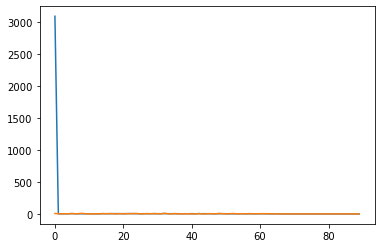

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

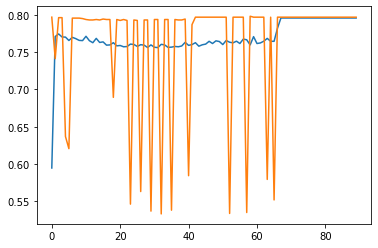

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])